In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the number of colors in the colormap
num_colors = 15

# Get the YlGnBu colormap from Matplotlib
cmap = plt.get_cmap('YlGnBu')

# Get a list of equally spaced values between 0 and 1
values = np.linspace(0.15, 0.85, num_colors)

# Get a list of RGBA colors for each value in the colormap
colors = [cmap(value) for value in values]

# Training Data for Heated Channel

In [2]:
# Load the .npz file
tr_dict = np.load("tr_ch/0_exp.npz")

# Print the shape of each array in the loaded .npz file
for key in tr_dict:
    print(f"Shape of '{key}': {tr_dict[key].shape}")
    
ndims = tr_dict['P'].shape[-1]
nsteps =tr_dict['P'].shape[0]

Shape of 'P': (2000, 33)
Shape of 'u': (2000, 33)
Shape of 'T': (2000, 33)
Shape of 'rho': (2000, 33)
Shape of 'z': (33,)
Shape of 't': (2000,)
Shape of 'u_bc': (2000,)
Shape of 'T_bc': (2000,)


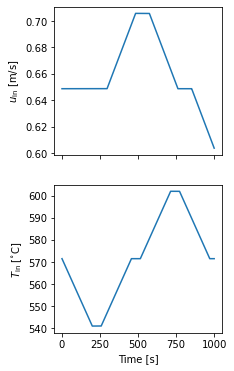

In [3]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(3,6))

axs[0].plot(tr_dict['t'][:], tr_dict['u_bc'][:])
axs[1].plot(tr_dict['t'][:], tr_dict['T_bc'][:]-273.15)

axs[1].set_xlabel('Time [s]')
axs[0].set_ylabel('$u_\mathrm{in}$ [m/s]')    
axs[1].set_ylabel('$T_\mathrm{in}$ [$^{\circ}$C]');

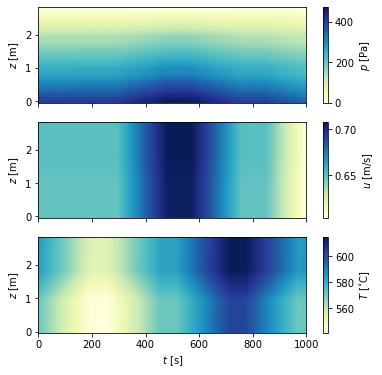

In [4]:
temp_z = np.linspace(0, max(tr_dict['z']), num=ndims)
temp_t = np.linspace(0, max(tr_dict['t']), num=nsteps)
zm_plot_pts, tm_plot_pts = np.meshgrid(temp_z, temp_t)

P_out = np.squeeze(tr_dict['P']-np.min(tr_dict['P']))
u_out = np.squeeze(tr_dict['u'])
T_out = np.squeeze(tr_dict['T'])

fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(6, 6))
p1 = axs[0].pcolor(tm_plot_pts,zm_plot_pts, P_out, cmap=cmap)
cb1 = plt.colorbar(p1, ax=axs[0])
cb1.set_label('$p$ [Pa]')

p2 = axs[1].pcolor(tm_plot_pts,zm_plot_pts, u_out, cmap=cmap)
cb2 = plt.colorbar(p2, ax=axs[1])
cb2.set_label('$u$ [m/s]')

p2 = axs[2].pcolor(tm_plot_pts, zm_plot_pts, T_out-273.15, cmap=cmap)
cb3 = plt.colorbar(p2, ax=axs[2])
cb3.set_label('$T$ [$^{\circ}$C]')

axs[2].set_xlabel('$t$ [s]')
for i in range(3):
    axs[i].set_ylabel('$z$ [m]')

# Training Data for Heated/Cooled Loop

In [5]:
# Load the .npz file
tr_dict = np.load("tr_loop/10_exp.npz")

# Print the shape of each array in the loaded .npz file
for key in tr_dict:
    print(f"Shape of '{key}': {tr_dict[key].shape}")
    
ndims = tr_dict['P'].shape[-1]
nsteps =tr_dict['P'].shape[0]

Shape of 'P': (5000, 66)
Shape of 'u': (5000, 66)
Shape of 'T': (5000, 66)
Shape of 'rho': (5000, 66)
Shape of 'z': (66,)
Shape of 't': (5000,)
Shape of 'qppp_in': (5000,)
Shape of 'head_p1': (5000,)


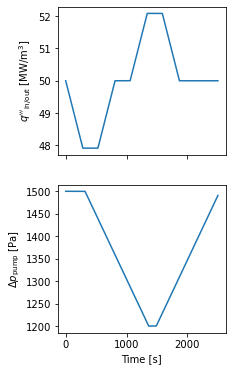

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(3,6))

axs[0].plot(tr_dict['t'][:], tr_dict['qppp_in'][:]/1.0e6)
axs[1].plot(tr_dict['t'][:], tr_dict['head_p1'][:])

axs[1].set_xlabel('Time [s]')
axs[0].set_ylabel("$q'''_\mathrm{in/out}$ [MW/m$^{3}$]")    
axs[1].set_ylabel('$\Delta p_\mathrm{pump}$ [Pa]');

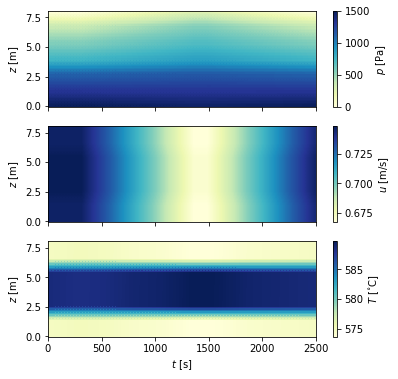

In [7]:
temp_z = np.linspace(0, max(tr_dict['z']), num=ndims)
temp_t = np.linspace(0, max(tr_dict['t']), num=nsteps)
zm_plot_pts, tm_plot_pts = np.meshgrid(temp_z, temp_t)

P_out = np.squeeze(tr_dict['P']-np.min(tr_dict['P']))
u_out = np.squeeze(tr_dict['u'])
T_out = np.squeeze(tr_dict['T'])

fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(6, 6))
p1 = axs[0].pcolor(tm_plot_pts,zm_plot_pts, P_out, cmap=cmap)
cb1 = plt.colorbar(p1, ax=axs[0])
cb1.set_label('$p$ [Pa]')

p2 = axs[1].pcolor(tm_plot_pts,zm_plot_pts, u_out, cmap=cmap)
cb2 = plt.colorbar(p2, ax=axs[1])
cb2.set_label('$u$ [m/s]')

p2 = axs[2].pcolor(tm_plot_pts, zm_plot_pts, T_out-273.15, cmap=cmap)
cb3 = plt.colorbar(p2, ax=axs[2])
cb3.set_label('$T$ [$^{\circ}$C]')

axs[2].set_xlabel('$t$ [s]')
for i in range(3):
    axs[i].set_ylabel('$z$ [m]')